In [5]:
!pip install tensorflow==1.14.0

In [6]:
!pip install opencv-python

In [7]:
!pip install keras==2.3.1

In [8]:
!pip install imageai --upgrade

Requirement already up-to-date: imageai in /usr/local/lib/python3.6/dist-packages (2.1.5)


In [9]:
from imageai.Detection import ObjectDetection
import os

input_img = "drive/My Drive/Colab Notebooks/input/apple.jpg"
output_img = "drive/My Drive/Colab Notebooks/output/" + "detections_" + os.path.basename(input_img)

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "drive/My Drive/Colab Notebooks/resources/resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , input_img), output_image_path=os.path.join(execution_path , output_img), extract_detected_objects=True)

if(len(detections[0])):
  if(len(detections[0]) > 1):
    biggest_object = 0;
    for i, obj in enumerate(detections[0]):
      a = obj['box_points'][2] - obj['box_points'][0]
      b = obj['box_points'][3] - obj['box_points'][1]
      if(a*b > biggest_object):
        biggest_object = a*b
        obj_name = obj['name']
        detected_img = detections[1][i]
  else:
    obj_name = detections[0][0]['name']
    detected_img = os.path.join(execution_path, input_img)
else:
  detected_img = os.path.join(execution_path, input_img)
  #get image file name for now
  obj_name = os.path.splitext(os.path.basename(input_img))[0]

asciicodes = [' ','!','"','#','$','%','&','','(',')','*','+',',','-','.','/',
          '0','1','2','3','4','5','6','7','8','9',':',';','<','=','>','?','@',
          'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
          'r','s','t','u','v','w','x','y','z','[','\\',']','^','_']

brailles = ['⠀','⠮','⠐','⠼','⠫','⠩','⠯','⠄','⠷','⠾','⠡','⠬','⠠','⠤','⠨','⠌','⠴','⠂','⠆','⠒','⠲','⠢',
        '⠖','⠶','⠦','⠔','⠱','⠰','⠣','⠿','⠜','⠹','⠈','⠁','⠃','⠉','⠙','⠑','⠋','⠛','⠓','⠊','⠚','⠅',
        '⠇','⠍','⠝','⠕','⠏','⠟','⠗','⠎','⠞','⠥','⠧','⠺','⠭','⠽','⠵','⠪','⠳','⠻','⠘','⠸']

ascii_braille = {}

for letter, braille in zip(asciicodes, brailles):
  ascii_braille[letter] = braille

def textToBraille(str):
  braillestr = ""
  for s in str:
    braillestr += ascii_braille[s]

  return braillestr

print("Object name: " + obj_name)
print("Object name in Braille: " + textToBraille(obj_name))
print("Image path: " + detected_img)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn



tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Object name: apple
Object name in Braille: ⠁⠏⠏⠇⠑
Image path: /content/drive/My Drive/Colab Notebooks/input/apple.jpg


In [10]:
import cv2
import numpy as np

#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 50
CANNY_THRESH_2 = 100
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,0.0) # In BGR format

#-- Read image -----------------------------------------------------------------------
img = cv2.imread(detected_img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

#-- Find contours in edges, sort by area ---------------------------------------------
contour_info = []
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

#-- Smooth mask, then blur it --------------------------------------------------------
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
# Create 3-channel alpha mask
mask_stack = np.dstack([mask]*3)

#-- Blend masked img into MASK_COLOR background --------------------------------------
# Use float matrices for easy blending
mask_stack  = mask_stack.astype('float32') / 255.0
img         = img.astype('float32') / 255.0

# Blend
masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR)
# Convert back to 8-bit
masked = (masked * 255).astype('uint8')

# split image into channels
c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

img_a = img_a[y:y+h, x:x+w]

final_img = "drive/My Drive/Colab Notebooks/output/cropped_" + os.path.splitext(os.path.basename(detected_img))[0] + ".png"
print(final_img)
cv2.imwrite(final_img, img_a*255)

drive/My Drive/Colab Notebooks/output/cropped_apple.png


True

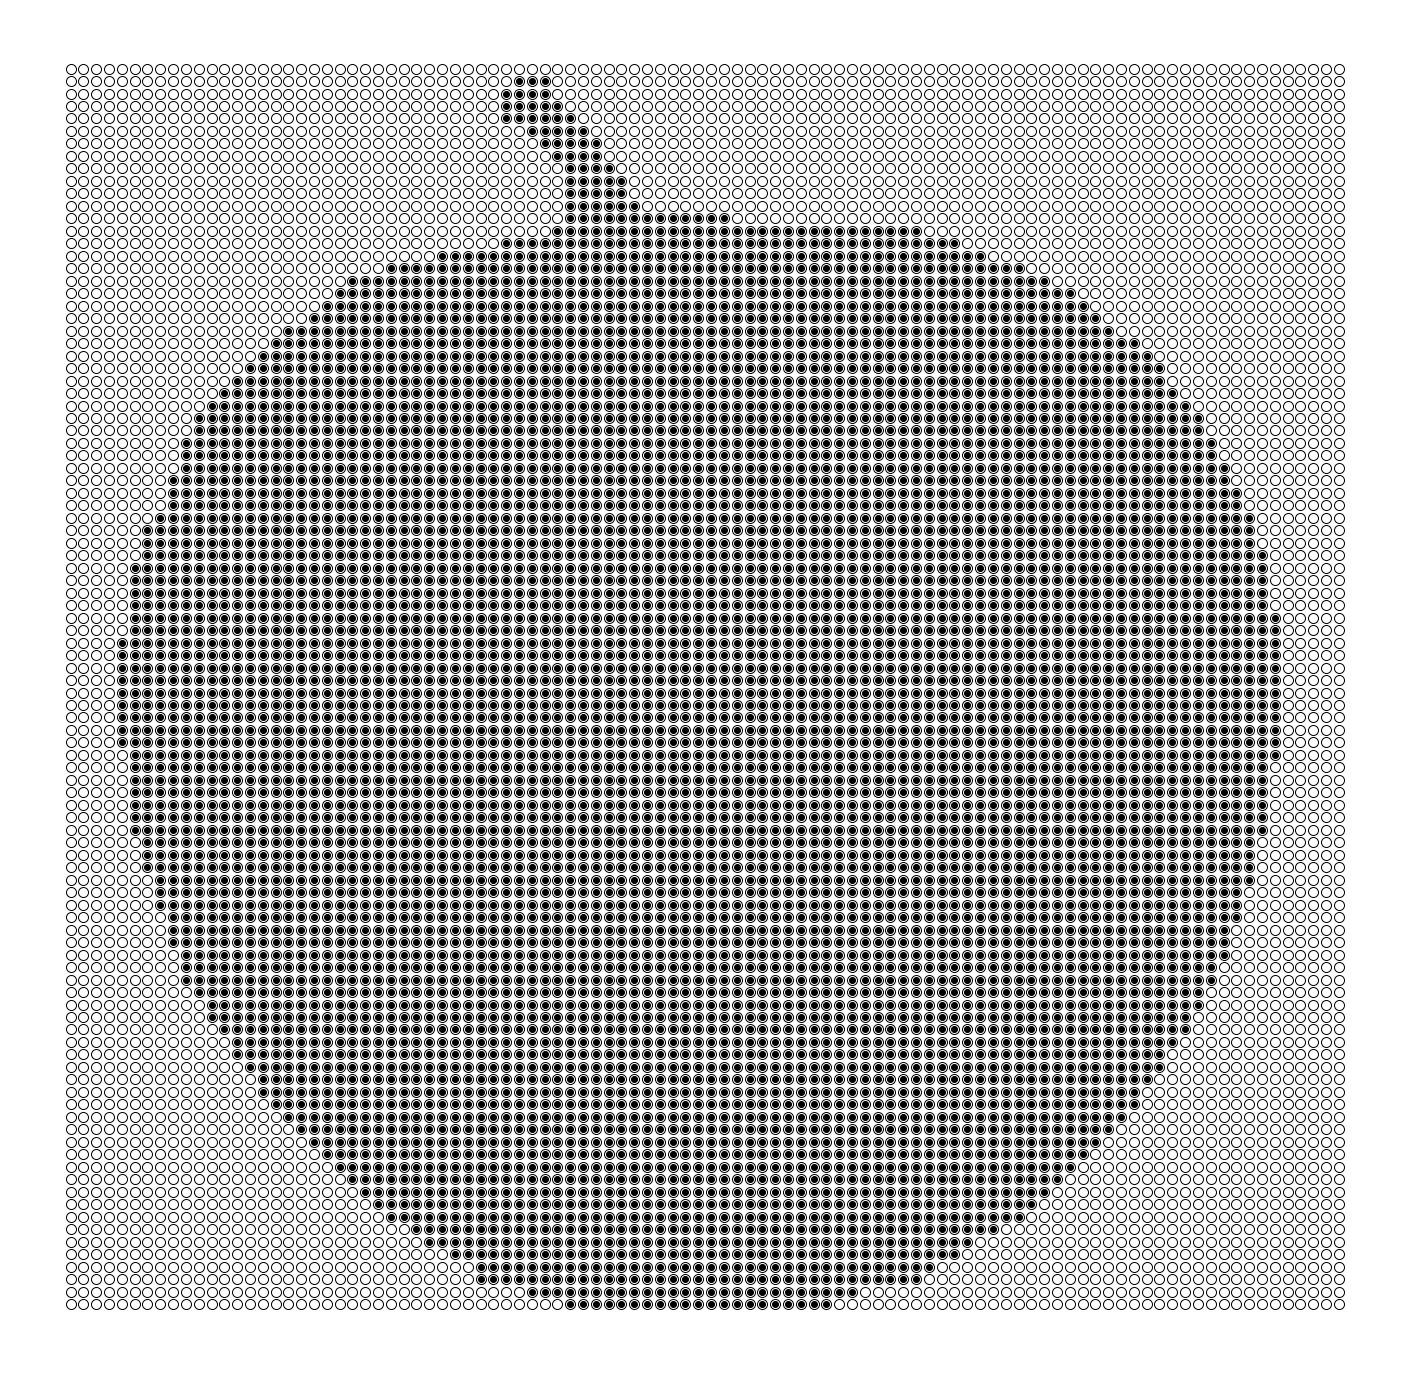

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

maxwidth = 100
maxheight = 100

opacity_treshold = 150

fig = plt.figure(figsize=(25, 25))
x, y = np.meshgrid(np.arange(maxwidth), np.arange(maxheight))

plt.plot(x, y, marker='o', color='w', markersize=10, markeredgecolor='k')

##############
img = Image.open(final_img)
img = img.convert("RGBA")
            
img.thumbnail((maxwidth, maxheight), Image.ANTIALIAS)

pixdata = img.load()

width, height = img.size

offsetwidth = int((maxwidth-width)/2)
offsetheight = int((maxheight-height)/2)

for y in range(height):
    for x in range(width):
      if(pixdata[x,y][3] > opacity_treshold):
        plt.plot(offsetwidth+x, offsetheight+height-y-1, marker='o', color='k')
##############

plt.axis('off')
plt.show()